# Project: Building a Traffic Sign Recognition Classifier using Deep ConvNets

In this notebook, I'm going to explain how Convolutional Neural Networks (aka ConvNets) can recognize and classify German traffic signs. This project is one of four projects of the first term of the Self-Driving cars NanoDegree by [Udacity](#udacity.com).

ConvNets are state-of-the-art pattern recognition that are being used to not only recognize traffic sign but also any kind of digital images. These networks can be trained to classify millions of images with accuracy better than humans. ConvNets are increasingly being used in different industrial and commercial areas such as Google's search engine, Facebook and all car manfuacturers who are investing in self-driving cars.

In this notebook, I'll explain the simplest ConvNet, the LeNet, which was invested by Yenn LeCunn to classify and recognize numerical digits for U.S post service back in 1999. The same network architecture is used here but with a few improvements and changes. Other sophisticated arichtecures such as VGG, GoogLeNet and ResNet can implemented for better accuracy.

This notebook is divided into 5 steps with sub sections:
1. Loading the Data
2. Data summary and exploration
3. Data preprocessing
4. Training model
5. Scoring and Predicting

Generally classification problems, images, text or audio, follow the same steps.

Let's begin.

---
## I: Load The Data

Importing libraries to use for compuation

In [1]:
import pickle
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import cv2
import pickle

%matplotlib inline

Defining Helper functions to make life easier

In [2]:
def load_file(filepath):
    """Load pickled file"""
    with open(filepath, mode='rb') as f:
        dataset = pickle.load(f)
    return dataset['features'], dataset['labels']

def lookup_name(class_number):
    """Retrieve the class/name name by passing the class number"""
    df = pd.read_csv('./signnames.csv')
    return df.ix[class_number].SignName 

def get_class_distribution_dict(y):
    """Get the distribution of all classes by passing the classes of a particular dataset"""
    class_frequency = np.bincount(y)
    classes = np.nonzero(class_frequency)[0]
    return {c:f for c, f in zip(classes, class_frequency[classes])}

In [3]:
# the local path of the data
# images are serialized
training_file = 'data/train.p'
testing_file = 'data/test.p'

X_train, y_train = load_file(training_file)
X_test, y_test = load_file(testing_file)

---

## II: Dataset Summary & Exploration

1. [Basic Summary](#1.-Basic-Summary)
1. [Plot a sample from each class](#1.-Plot-a-sample-from-each-class)
2. [Print the class distribution](#2.-Print-the-class-distribution)
3. [Plot the frequencies for Training Set](#3.-Plot-the-Frequency-for-each-class-in-Training-Set)
4. [Plot the frequencies for Test Set](#4.-Plot-the-Frequency-for-each-class-in-Testing-Set)

### 1. Basic Summary

In [4]:
#Number of training examples
n_train = X_train.shape[0]

#Number of testing examples.
n_test = X_test.shape[0]

#The shape of an traffic sign image?
image_shape = X_train.shape[1:4]

#Number of unique classes/labels
all_classes = np.unique(y_train)
n_classes = np.count_nonzero(all_classes)

symmetrical_classes = np.array([12,13,15,17,18,22,26,30,35])

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 42


### 2. Plot a sample from each class
Loop through the 43 traffic sign classes and plot a figure showing the image, class number and name, then save it locally.
This will help me later when doing individual predictions/scoring

/home/carnd/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


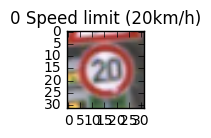

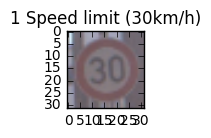

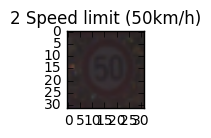

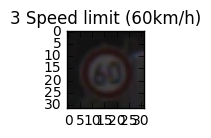

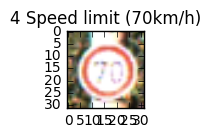

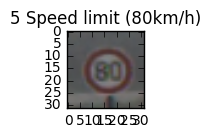

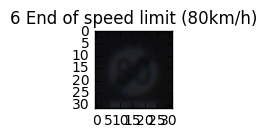

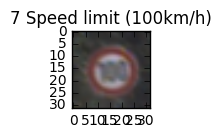

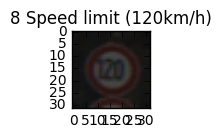

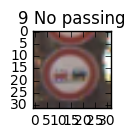

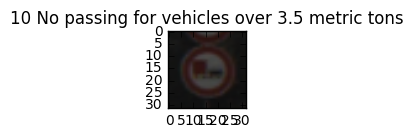

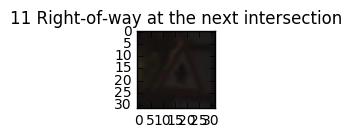

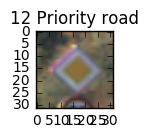

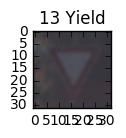

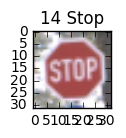

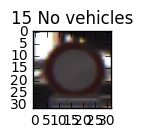

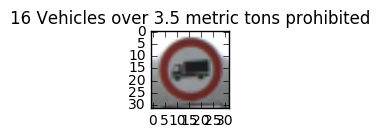

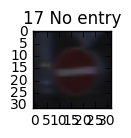

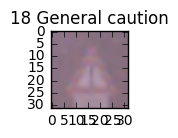

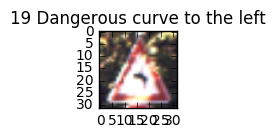

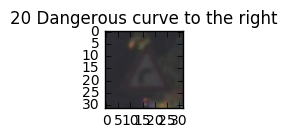

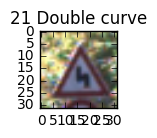

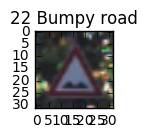

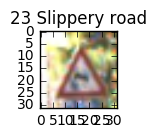

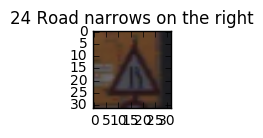

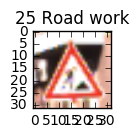

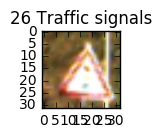

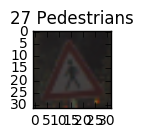

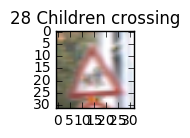

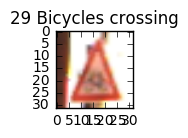

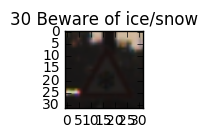

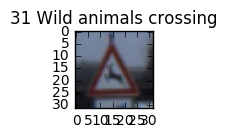

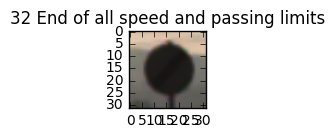

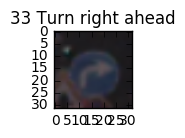

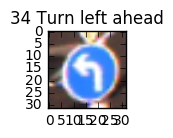

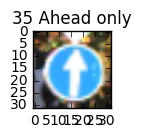

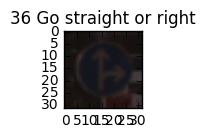

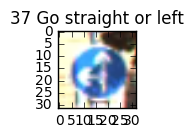

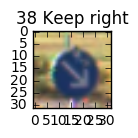

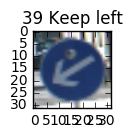

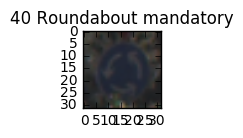

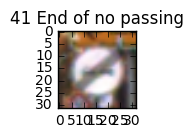

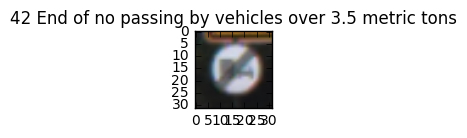

In [5]:
all_classes = np.unique(y_train)
for i in range(len(all_classes)):
    class_number = i

    image = X_train[np.argwhere(y_train == class_number)[10]].squeeze()
    fig = plt.figure(figsize=(1,1))
    plt.imshow(image)
    image_name = "{} {}".format(class_number , lookup_name(class_number))
    plt.title(image_name)
    #fig.savefig("./samples/{}".format(class_number), dpi=fig.dpi)


### 3. Print the class distribution
The helper function returns a dictionary where the keys are the classes and the vlaues are the totals.
For example, in the training set, class number **1** has 1560 images

In [6]:
freq_train_dict = get_class_distribution_dict(y_train)
print("Frequencies in Training set=")
print (freq_train_dict)

freq_test_dict = get_class_distribution_dict(y_test)
print("Frequencies in Test set=")
print (freq_test_dict)

Frequencies in Training set=
{0: 210, 1: 2220, 2: 2250, 3: 1410, 4: 1980, 5: 1860, 6: 420, 7: 1440, 8: 1410, 9: 1470, 10: 2010, 11: 1320, 12: 2100, 13: 2160, 14: 780, 15: 630, 16: 420, 17: 1110, 18: 1200, 19: 210, 20: 360, 21: 330, 22: 390, 23: 510, 24: 270, 25: 1500, 26: 600, 27: 240, 28: 540, 29: 270, 30: 450, 31: 780, 32: 240, 33: 689, 34: 420, 35: 1200, 36: 390, 37: 210, 38: 2070, 39: 300, 40: 360, 41: 240, 42: 240}
Frequencies in Test set=
{0: 60, 1: 720, 2: 750, 3: 450, 4: 660, 5: 630, 6: 150, 7: 450, 8: 450, 9: 480, 10: 660, 11: 420, 12: 690, 13: 720, 14: 270, 15: 210, 16: 150, 17: 360, 18: 390, 19: 60, 20: 90, 21: 90, 22: 120, 23: 150, 24: 90, 25: 480, 26: 180, 27: 60, 28: 150, 29: 90, 30: 150, 31: 270, 32: 60, 33: 210, 34: 120, 35: 390, 36: 120, 37: 60, 38: 690, 39: 90, 40: 90, 41: 60, 42: 90}


### 4. Plot the Frequency for each class in Training Set
Visualize the class distribution using the dictionary returned from the cell above.

**NOTE** The class distribution is not uniformly distributed. This will be fixed in the Data augmentation section.

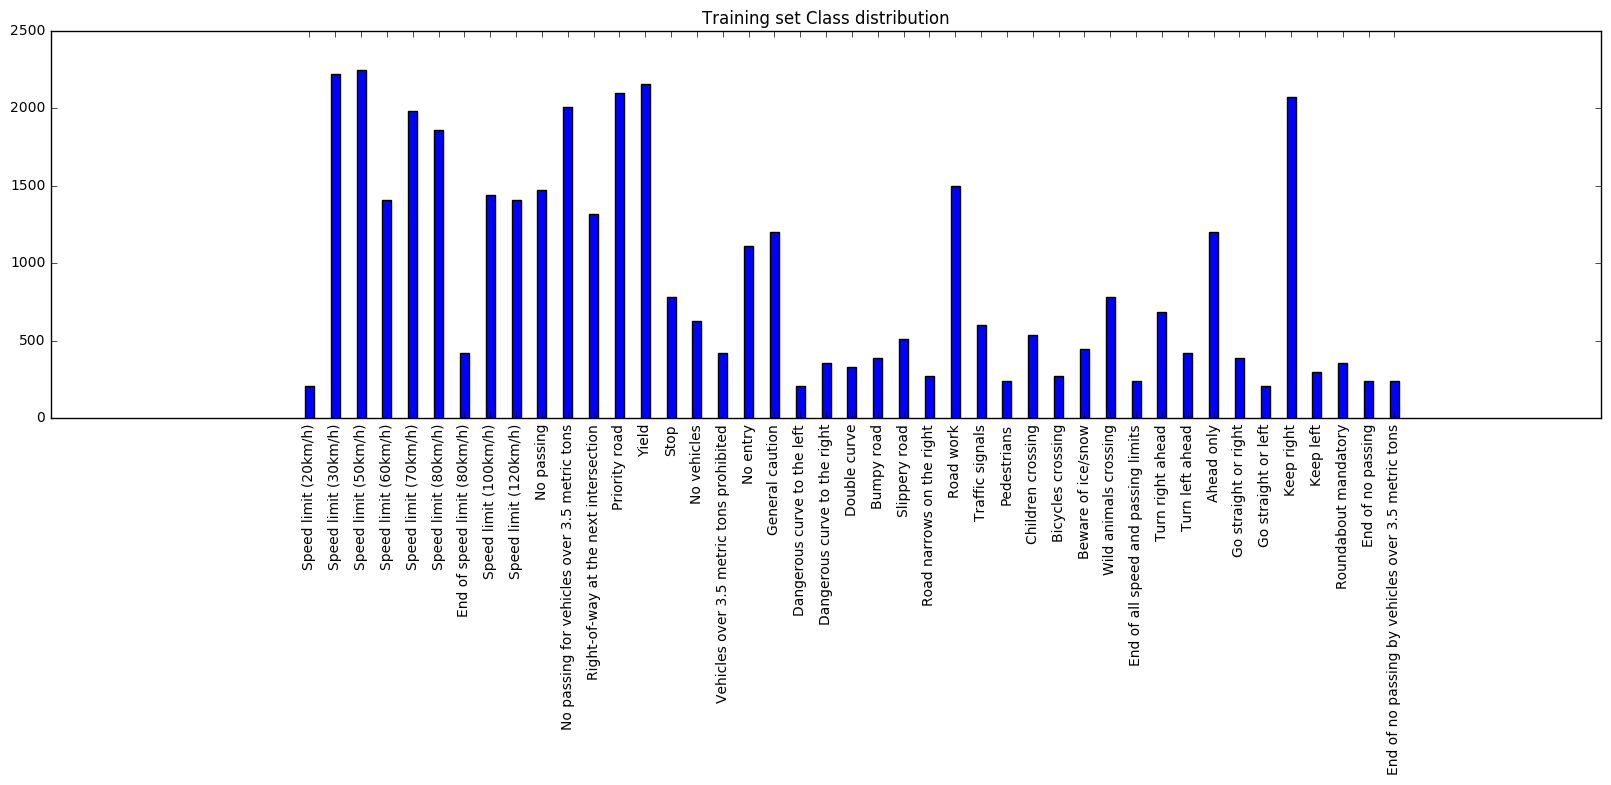

In [7]:
width = 0.35 
plt.figure(figsize=(20,5))
plt.bar(range(len(freq_train_dict)), freq_train_dict.values(), align='center', width=width);
plt.title("Training set Class distribution")
plt.xticks(range(len(freq_train_dict)), [lookup_name(x) for x in list(freq_train_dict.keys())], rotation=90);

### 5. Plot the Frequency for each class in Testing Set

The shape of the distribution in the testing set is not important when training the model, so it's ok

In [ ]:
width = 0.35 
plt.figure(figsize=(20,5))
plt.bar(range(len(freq_test_dict)), freq_test_dict.values(), align='center', width=width);
plt.xticks(range(len(freq_test_dict)), [lookup_name(x) for x in list(freq_test_dict.keys())], rotation=90);

## Step 2: Preprocessing Data

Before training the model, the data has to be preprocessed as follows:

1. [Shuffling and Splitting](#1.-Shuffle-and-Split)
2. [Data Augmentation](#2.-Data-Augmentation)
3. [RGB to Grayscale](#3.-RGB-to-Grayscale)
4. [Data Normalization](#4.-Data-Normalizationn)

Defining functions for data preprcessing

In [9]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

def normalize(X):
    """Centre the data around zero and rescale it to be around -0.5 and 0.5"""
    return X / 255. - 0.5


def rgb_to_grayscale(images):
    """Reduce the image from 3 RGB channels to 1 channel"""
    gray_images = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray_eq = cv2.equalizeHist(gray)
        gray_images.append(gray_eq)
        
    gray_images = np.array(gray_images).reshape((-1,32,32,1))
    return np.array(gray_images)


def transform_image(img, ang_range, shear_range, trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    By student Vivek Yadav
    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img


def generate_data_augmenation(X, y, class_distribution_dict, max_value):
    _, height, width, depth = X.shape
    X_augmented = []
    y_augmented = []
    ang_range, shear_range, trans_range = 15, 10, 2
    
    # loop through all classes and unpack the key and value
    for c, v in class_distribution_dict.items():
        
        # subtract the total number of examples in the current class from the max value
        # if the subtraction is less than zero, then return zero, otherwise return the value
        n_examples_to_generate = max(max_value - v, 0)
        
        # get the index of the current class
        ix = y[y == c]
        length = y[y == c].shape[0]
        # randomly generate an integer number
        random_index = random.randint(0, length - 1)
        # from the returned indices, pick a random example
        selected_index = np.where(y == c)[0][random_index]
            
        for n in range(n_examples_to_generate):
            random_index = random.randint(0, length - 1)
            selected_index = np.where(y == c)[0][random_index]
            transformed_image = transform_image(X[selected_index], ang_range, shear_range, trans_range)

            X_augmented.append(transformed_image)
            y_augmented.append(c)   
        
    return np.array(X_augmented), np.array(y_augmented)

### 1. Shuffle and Split

Randomly Shuffle the data to avoid any bias, then split the data into training and validaion.
The validation set will be used to measure the accruacy of the model while the model is being trained.

In [10]:
X_train, y_train = shuffle(X_train, y_train)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

print("Training", X_train.shape)
print("Validation", X_validation.shape)

Training (27446, 32, 32, 3)
Validation (11763, 32, 32, 3)


### 2. Data Augmentation

The data provided for this project was not balanced and this could lead the model to recognize certain classes better than other classes with low examples. To solve this problem, additional data can be generated from the classes with low examples to reach balance. Also data augmenation significantly helps the model to identifiy more generalized examples.

In [14]:
n_examples_to_get = 8000
class_distribution_dict = get_class_distribution_dict(y_train)

X_train, y_train = shuffle(X_train, y_train)

# always augment from the original training set
X_new_augmented, y_new_augmented = generate_data_augmenation(X_train, y_train, class_distribution_dict, n_examples_to_get)

#combine original training set with augmented set
X_train = np.concatenate((X_train, X_new_augmented))
y_train = np.concatenate((y_train, y_new_augmented))
    
print("Number of newly generated training examples = ", X_new_augmented.shape[0])
print("Total Number of training examples = ", y_train.shape[0])

Number of newly generated training examples =  86000
Total Number of training examples =  344000


#### Visualizing Class distribution after the data augmentation
Classes should be evenly distributed after generating data from the cell above

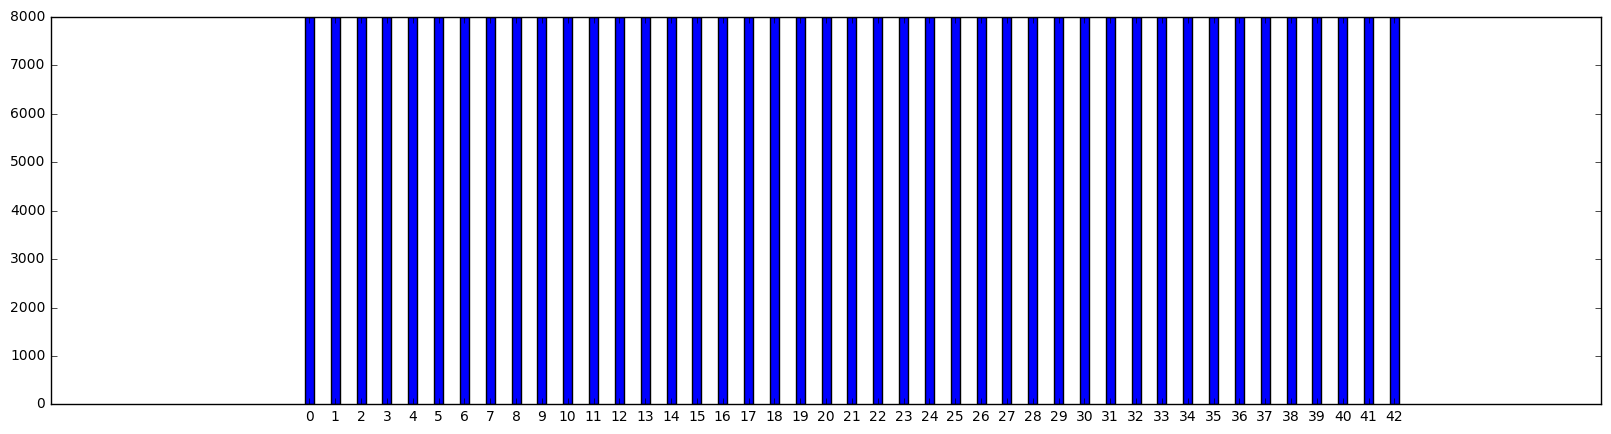

In [15]:
class_distribution_dict = get_class_distribution_dict(y_train)

width = 0.35 
plt.figure(figsize=(20,5))
plt.bar(range(len(class_distribution_dict)), class_distribution_dict.values(), align='center', width=width);
plt.xticks(range(len(class_distribution_dict)), list(class_distribution_dict.keys()));

### 3. RGB to Grayscale

Reduce the size of all data sets from 3 channels to 1 channel.
This step increases the model training.

In [16]:
X_train = rgb_to_grayscale(X_train)
X_validation = rgb_to_grayscale(X_validation)
X_test = rgb_to_grayscale(X_test)
print(X_train.shape)
print(X_test.shape)

(344000, 32, 32, 1)
(12630, 32, 32, 1)


### 4. Data Normalization

Centre the data around zero and scale it so it ranges between -0.5 and 0.5.
This step is extremely important becuase it helps the optimization process to find a global minimum.

In [17]:
X_train = normalize(X_train)
X_validation = normalize(X_validation)
X_test = normalize(X_test)

----

## Step 2: Design and Test a Model Architecture

![GitHub Logo](lenet.png)

My changes to the above architecture is marked in **Bold**
* **Batch Normaliztion**
* Conv
* Relu
* Max Pool
* Conv
* Relu
* Fully connected
* **droput (probability 0.5)**
* Fully connected
* **droput (probability 0.5)**
* Fully connected

### Hyperparameters
* Learning rate: **1e-3**
* Optimizer: **Adam**
* Batch Size: **512**
* Epochs: **50**
* Droput **0.5**
* mu = 0 and sigma = 0.1

In [18]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import datetime

In [19]:
def xavier_init(fan_in, fan_out, constant=1): 
    """ Xavier initialization of network weights"""
    # https://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
    low = -constant*np.sqrt(6.0/(fan_in + fan_out)) 
    high = constant*np.sqrt(6.0/(fan_in + fan_out))
    return tf.random_uniform((fan_in, fan_out), 
                             minval=low, maxval=high, 
                             dtype=tf.float32) / tf.sqrt(fan_in / 2)

In [20]:
rate = 5e-3
EPOCHS = 50
BATCH_SIZE = 512

In [21]:
keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)


def LeNet(x):    
    x_batch_norm = tf.contrib.layers.batch_norm(x)
    
    # Hyperparameters
    mu = 0
    sigma = 0.01
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    c
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x_batch_norm, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    #fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_W = tf.Variable(xavier_init(400, 120))
    fc1_b = tf.Variable(tf.zeros(120))
    
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob1)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    #fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_W  = tf.Variable(xavier_init(120, 84))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob2)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    #fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_W  = tf.Variable(xavier_init(84, 43))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [22]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [23]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 1.0, keep_prob2: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Training...

EPOCH 1 learning_rate = 0.001000 Loss = 1.892769 Accuracy = 0.561
EPOCH 2 learning_rate = 0.001000 Loss = 1.409891 Accuracy = 0.697
EPOCH 3 learning_rate = 0.001000 Loss = 1.242941 Accuracy = 0.760
EPOCH 4 learning_rate = 0.001000 Loss = 1.097142 Accuracy = 0.789
EPOCH 5 learning_rate = 0.001000 Loss = 1.036876 Accuracy = 0.805
EPOCH 6 learning_rate = 0.001000 Loss = 0.831493 Accuracy = 0.843
EPOCH 7 learning_rate = 0.001000 Loss = 0.986838 Accuracy = 0.848
EPOCH 8 learning_rate = 0.001000 Loss = 0.850845 Accuracy = 0.851
EPOCH 9 learning_rate = 0.001000 Loss = 0.789989 Accuracy = 0.860
EPOCH 10 learning_rate = 0.001000 Loss = 0.904198 Accuracy = 0.862
EPOCH 11 learning_rate = 0.001000 Loss = 0.729398 Accuracy = 0.875
EPOCH 12 learning_rate = 0.001000 Loss = 0.734901 Accuracy = 0.884
EPOCH 13 learning_rate = 0.001000 Loss = 0.631329 Accuracy = 0.889
EPOCH 14 learning_rate = 0.001000 Loss = 0.705581 Accuracy = 0.894
EPOCH 15 learning_rate = 0.001000 Loss = 0.737282 Accuracy

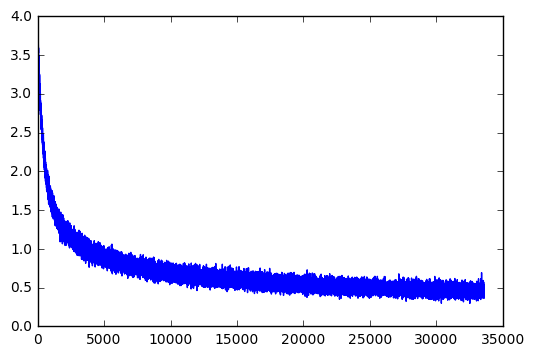

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    loss_list = []
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 0.9, keep_prob2: 0.9, })
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 0.9, keep_prob2: 0.9,})
            
            loss_list.append(loss)
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} Loss = {:.6f} Accuracy = {:.3f}".format(i+1, loss, validation_accuracy))
    
    plt.plot(loss_list)
    filename = "./LeNet/{:3f}-{:%Y%m%d%H}.ckpt".format((validation_accuracy * 100), datetime.datetime.now())
    saver.save(sess, filename)
    print("Model saved")

---

## Step 3: Test a Model on New Images


In [25]:
from os import listdir
from os.path import isfile, join

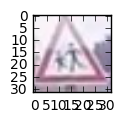

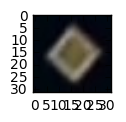

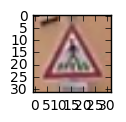

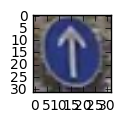

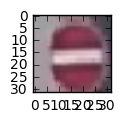

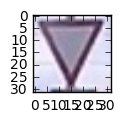

In [27]:
#read all file names under test directory
test_images = ["children crossing.jpg","priority road-n.jpg","ped.jpg", "ahead.jpg", "no entry.jpg", "yield.jpg"]

#plot all images found
for i in range(len(test_images)):
    #print ("./test/"+images[i])
    img = plt.imread("./tests/"+ test_images[i])
    plt.figure(figsize=(1,1))
    plt.imshow(img)

#### Measuring accuracy on Testing set

In [26]:
print("testing shape = ", X_test.shape)
with tf.Session() as sess:
    saver.restore(sess, filename)

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

testing shape =  (12630, 32, 32, 1)
Test Accuracy = 0.878


### Predicting the five candidate images 

In [28]:
images_softmax = {}
with tf.Session() as sess:
    
    for test_img in test_images:
        saver.restore(sess, filename)
        img = plt.imread("./tests/" + test_img)
        img = rgb_to_grayscale([img])
        X = np.array(normalize(img))
        soft = tf.nn.softmax(logits)

        softmax_probabilities = sess.run(soft, feed_dict= {x: X, one_hot_y:[all_classes],keep_prob1: 1.0, keep_prob2: 1.0})
        images_softmax[test_img] = softmax_probabilities

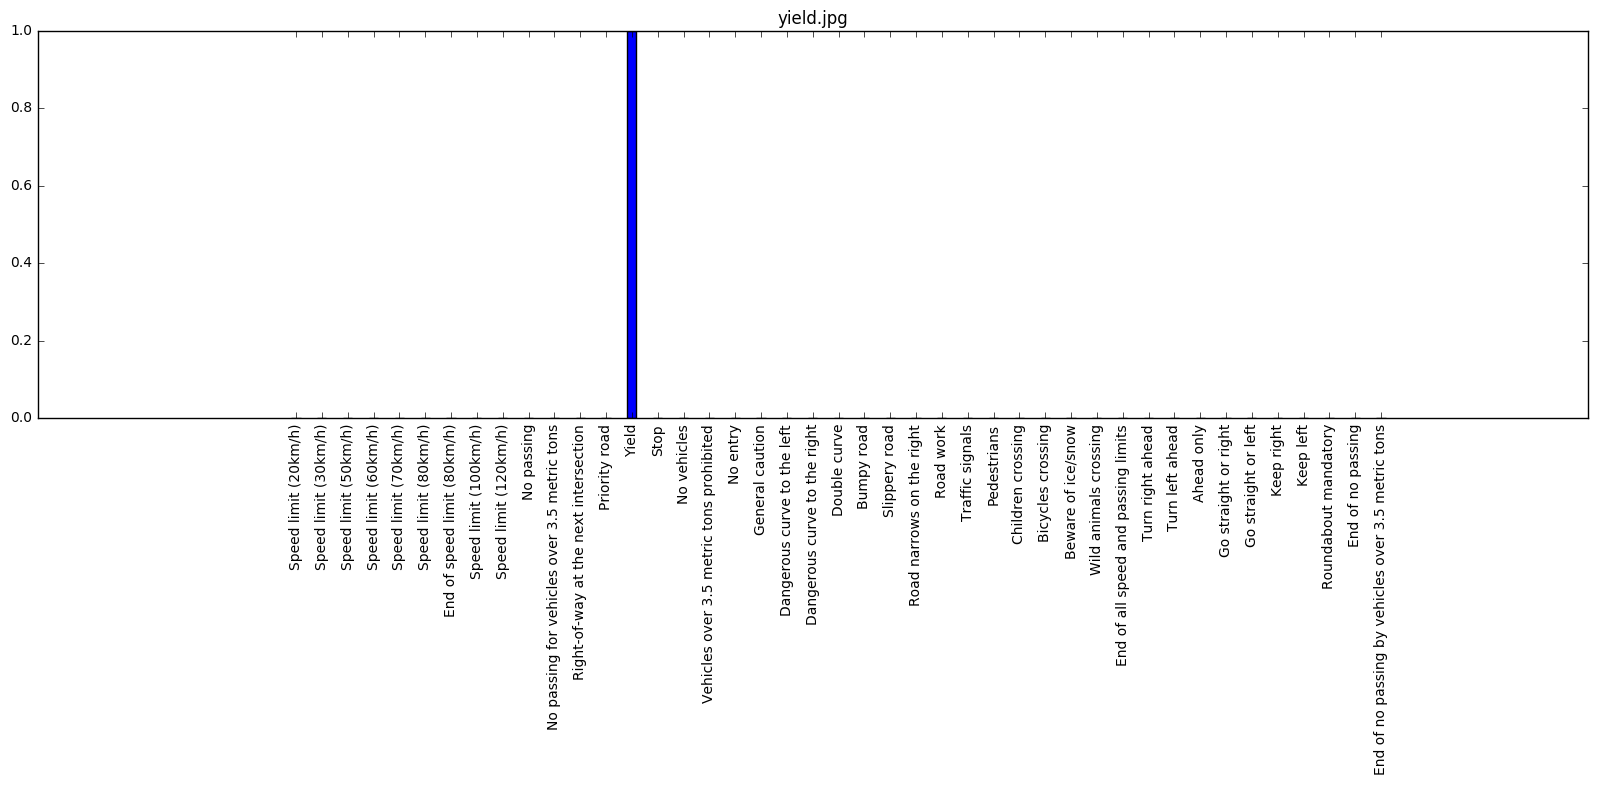

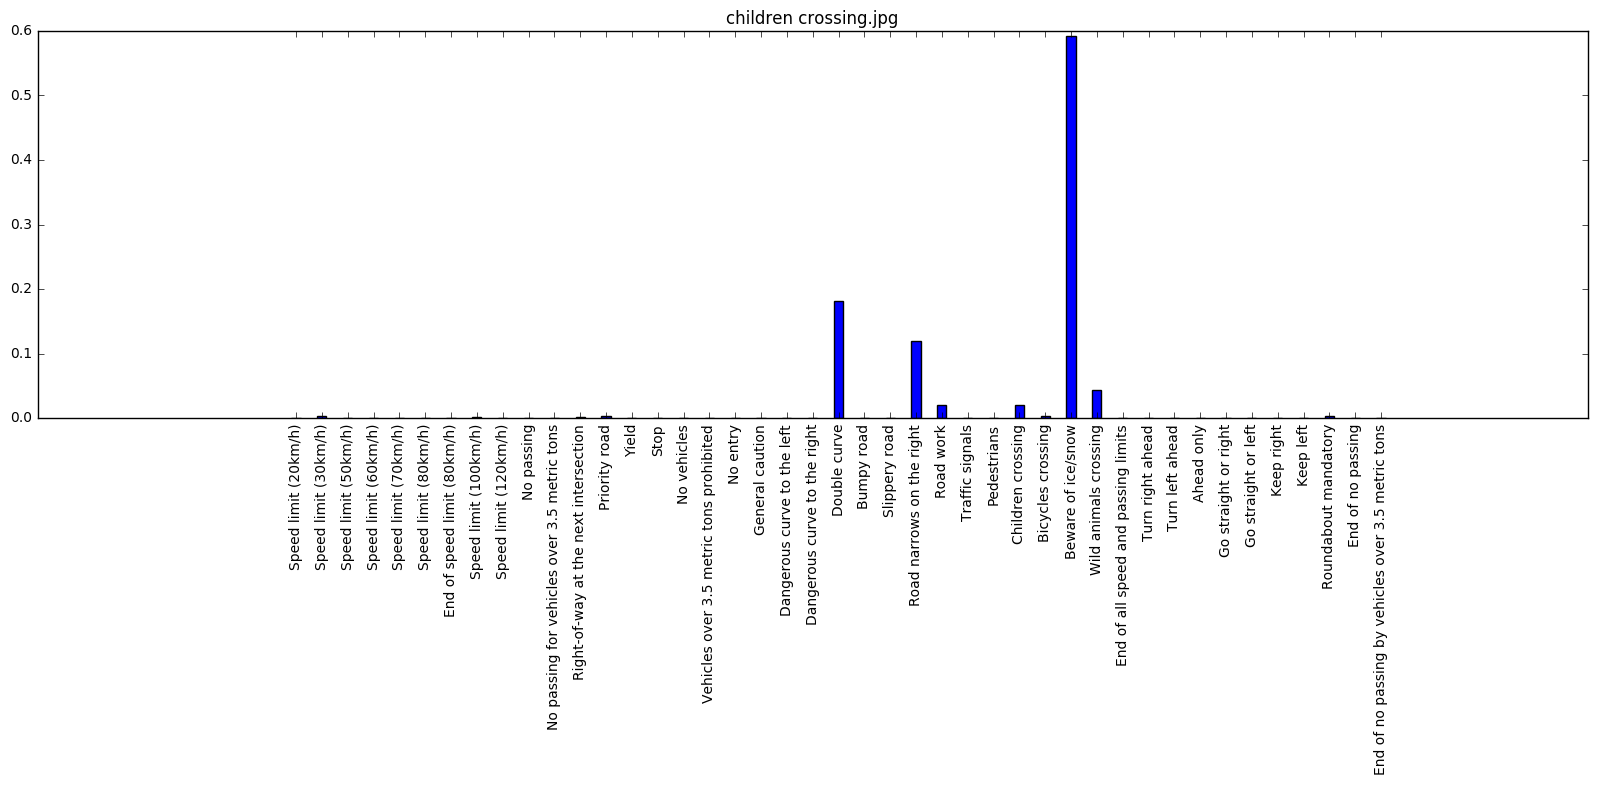

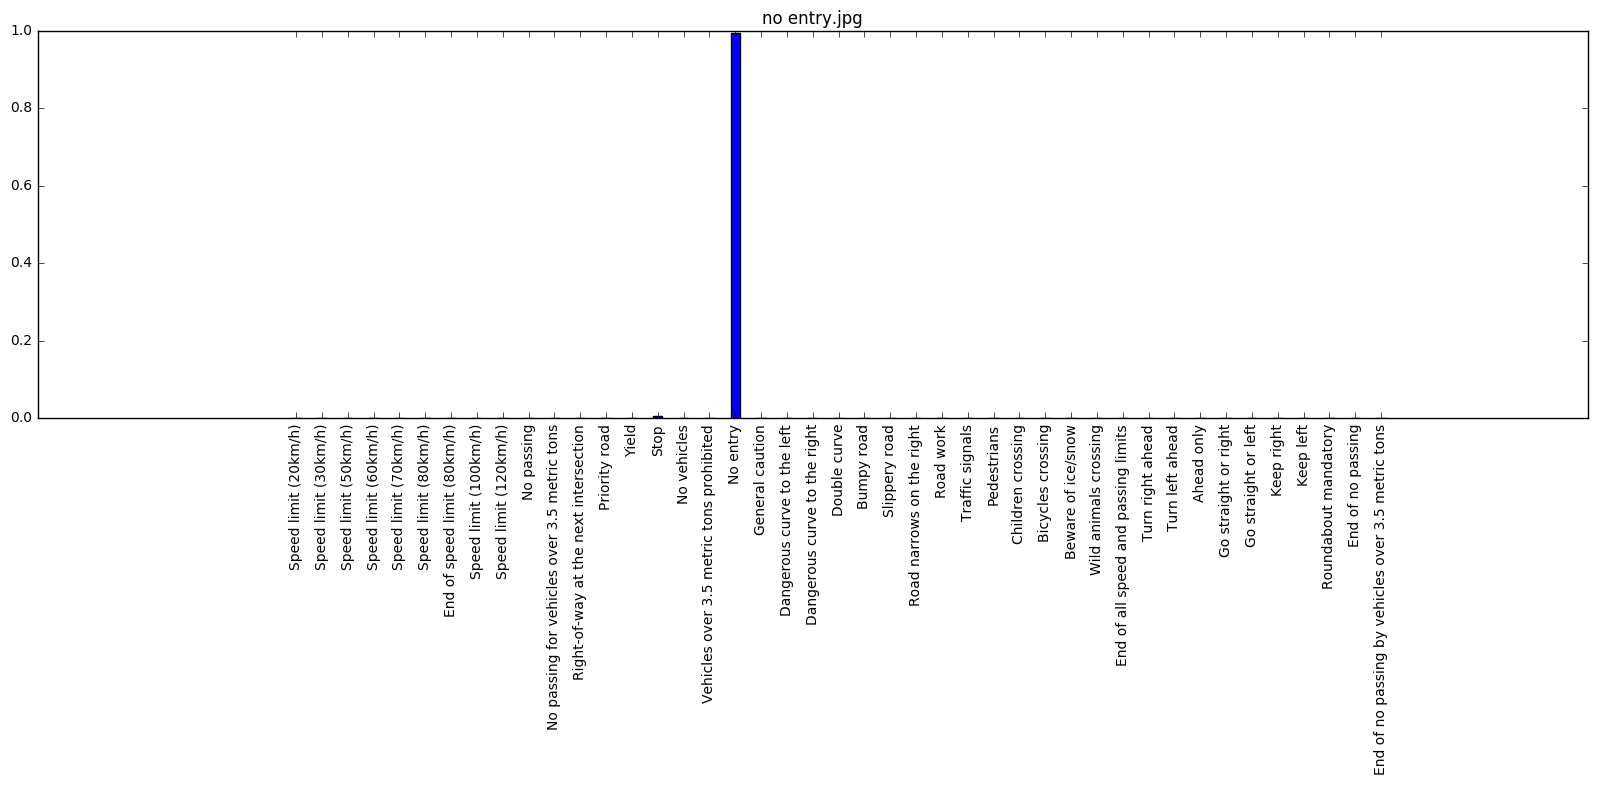

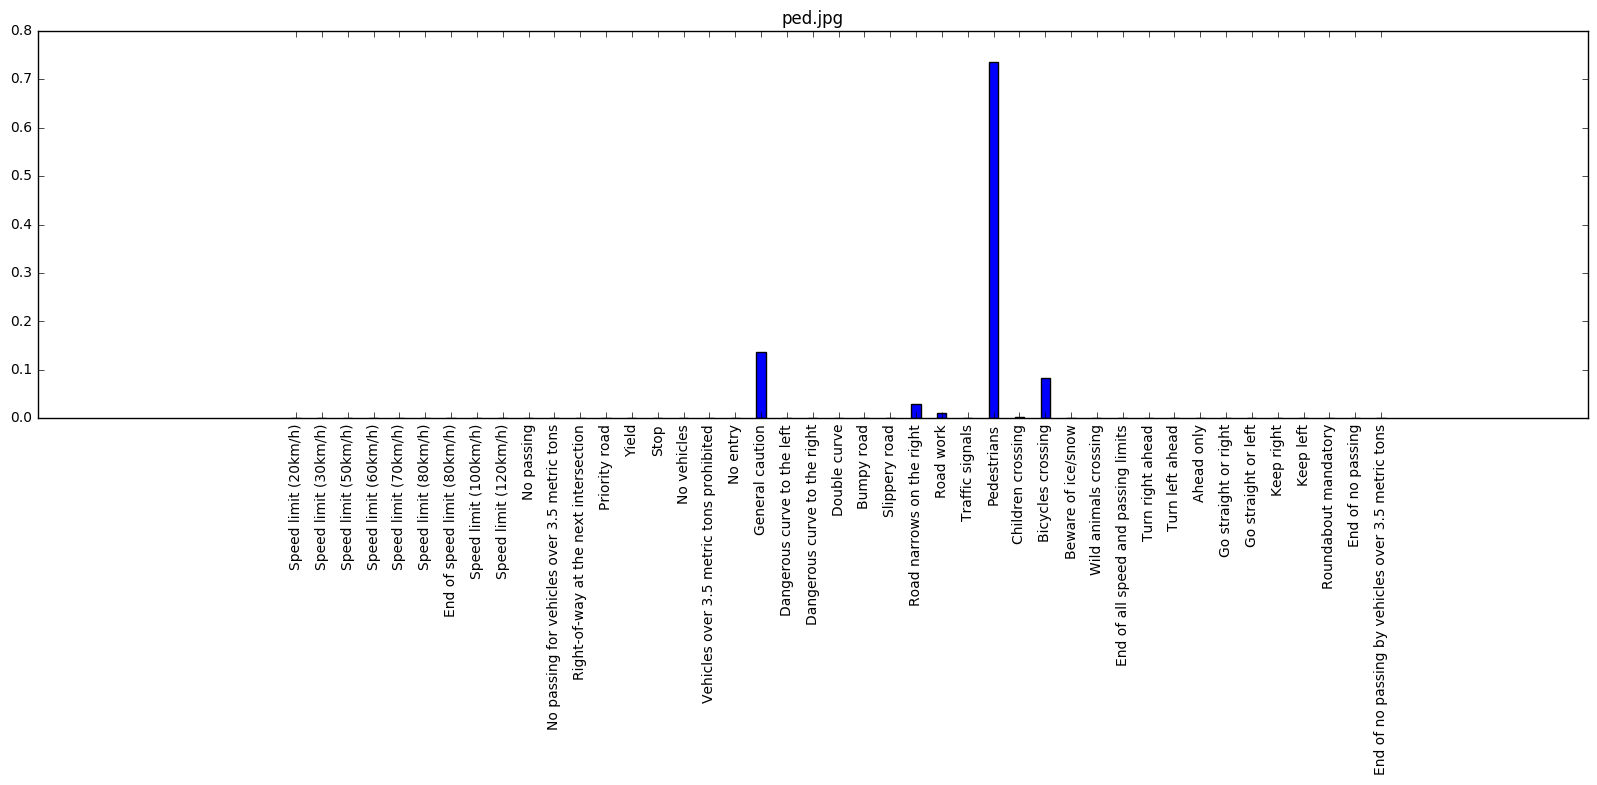

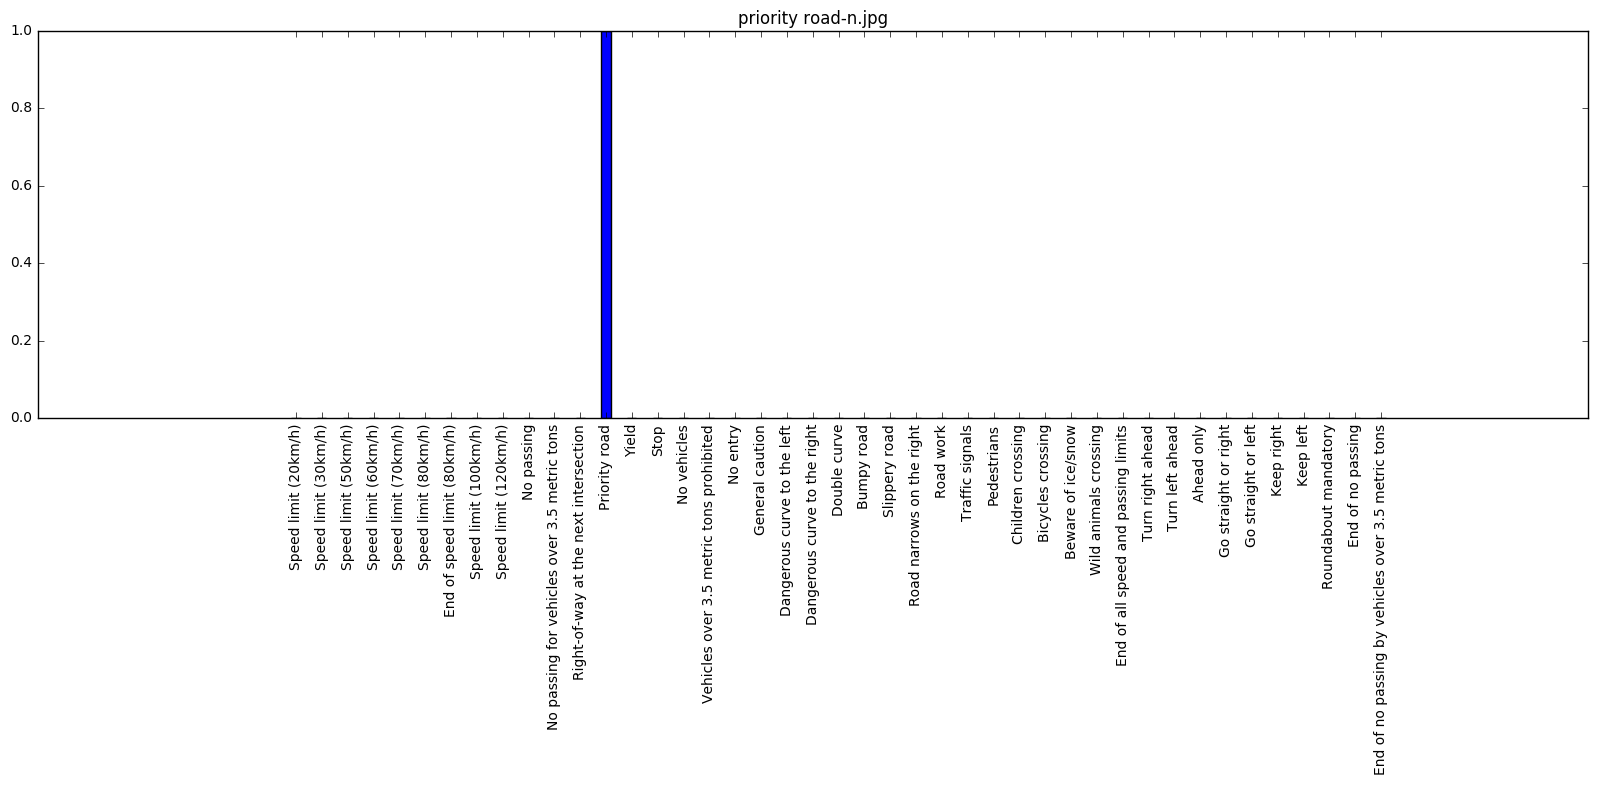

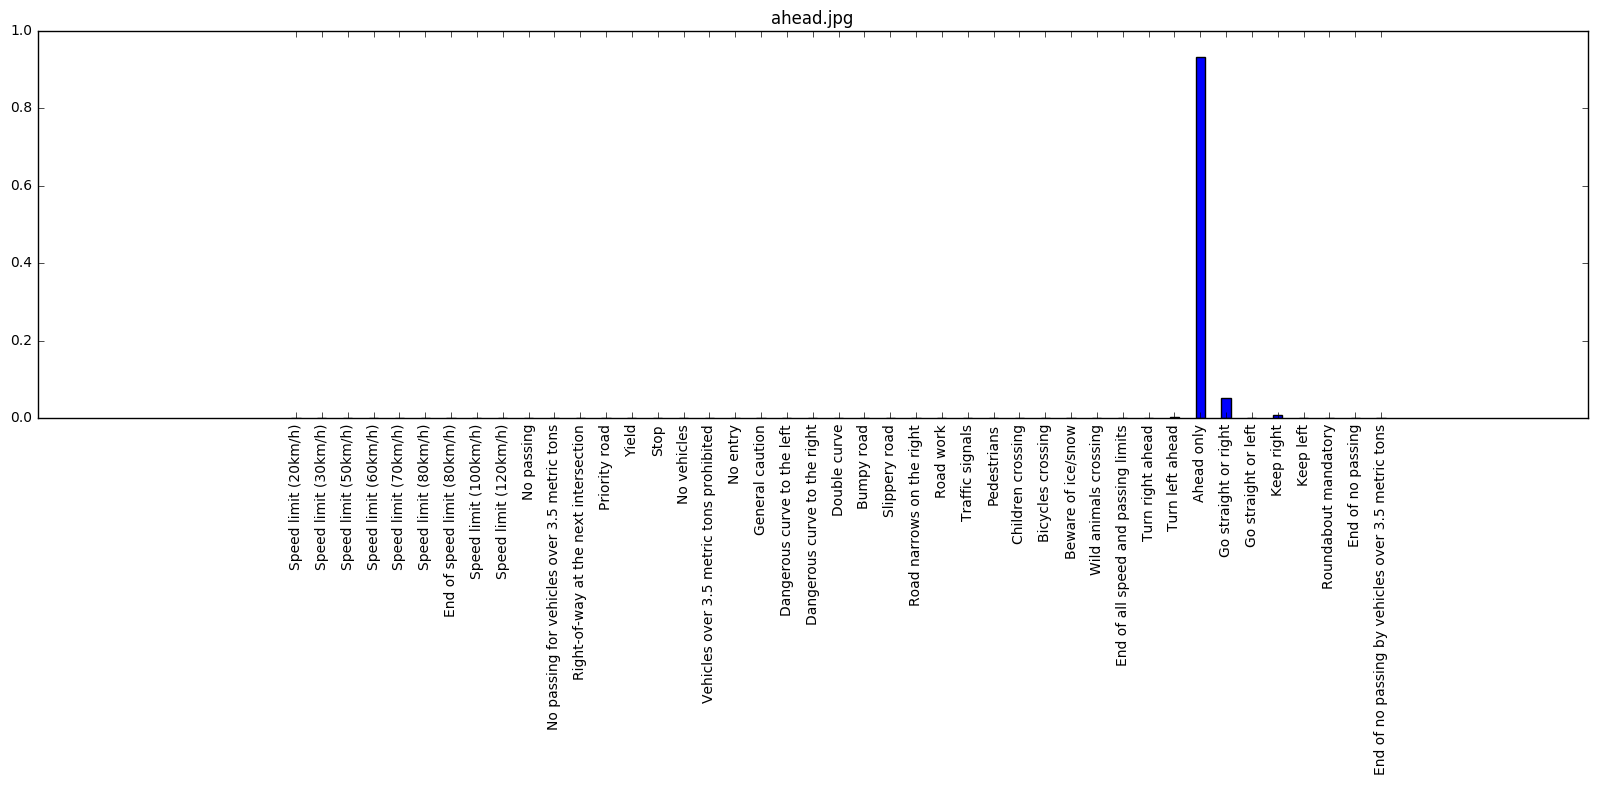

In [29]:
width = 0.35
for img_softmax in images_softmax:
    softmax_probability = images_softmax[img_softmax][0]
    plt.figure(figsize=(20,5))
    plt.bar(range(len(softmax_probability)), softmax_probability, align='center', width=width);
    plt.title(img_softmax)
    plt.xticks(range(len(softmax_probability)), [lookup_name(x) for x in all_classes], rotation=90);

In [30]:
images_softmax = {}
 
with tf.Session() as sess:
    
     for test_img in test_images:
        saver.restore(sess, filename)
        img = plt.imread("./tests/" + test_img)
        img = rgb_to_grayscale([img])
        X = np.array(normalize(img))
        soft = tf.nn.softmax(logits)

        
        softmax_probabilities = sess.run(soft, feed_dict= {x: X, one_hot_y:[all_classes],keep_prob1: 1.0, keep_prob2: 1.0})
        top = sess.run(tf.nn.top_k(softmax_probabilities, k=3))
        print("Actual={} \t\tPredicted={}".format(test_img, [lookup_name (x) for x in top.indices[0]]))
           

Actual=children crossing.jpg 		Predicted=['Beware of ice/snow', 'Double curve', 'Road narrows on the right']
Actual=priority road-n.jpg 		Predicted=['Priority road', 'Roundabout mandatory', 'Double curve']
Actual=ped.jpg 		Predicted=['Pedestrians', 'General caution', 'Bicycles crossing']
Actual=ahead.jpg 		Predicted=['Ahead only', 'Go straight or right', 'Keep right']
Actual=no entry.jpg 		Predicted=['No entry', 'Stop', 'Keep right']
Actual=yield.jpg 		Predicted=['Yield', 'Right-of-way at the next intersection', 'Children crossing']
